# Compare loading speed between Pandas and PySpark on a 8GB CSV

## Part 1 PySpark

In [1]:
import numpy as np
import pandas as pd
from pyspark.sql import SQLContext,SparkSession
from pyspark.sql.types import *
import time

In [2]:
spark=SparkSession.builder.config('Spark Sample').appName('taSpark').getOrCreate()

Loading Time

In [3]:
start_time = time.time()
Nov = spark.read.option("header", "true").csv('2019-Nov.csv')
Loadtimespark = time.time() - start_time
print(str(Loadtimespark)+' Seconds')

6.261534690856934 Seconds


Show Table

In [4]:
start_time = time.time()
Nov.show()
Showtabletime = time.time() - start_time
print(str(Showtabletime)+' Seconds')

+--------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|   brand| price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+
|2019-11-01 00:00:...|      view|   1003461|2053013555631882655|electronics.smart...|  xiaomi|489.07|520088904|4d3b30da-a5e4-49d...|
|2019-11-01 00:00:...|      view|   5000088|2053013566100866035|appliances.sewing...|  janome|293.65|530496790|8e5f4f83-366c-4f7...|
|2019-11-01 00:00:...|      view|  17302664|2053013553853497655|                null|   creed| 28.31|561587266|755422e7-9040-477...|
|2019-11-01 00:00:...|      view|   3601530|2053013563810775923|appliances.kitche...|      lg|712.87|518085591|3bfb58cd-7892-48c...|
|2019-11-01 00:00:...|      view|   1004775|2053013555631882655|elect

Number of Rows

In [5]:
start_time = time.time()
Nov.count()
Counttime = time.time() - start_time
print(str(Counttime)+' Seconds')

44.648733615875244 Seconds


Groupby

In [6]:
start_time = time.time()
Nov.groupBy('brand').count().orderBy('count',ascending=0).show()
Groupbytime = time.time() - start_time
print(str(Groupbytime)+' Seconds')

+--------+-------+
|   brand|  count|
+--------+-------+
|    null|9218235|
| samsung|7889245|
|   apple|6259379|
|  xiaomi|4638062|
|  huawei|1410126|
| lucente|1185075|
|      lg|1096990|
|   bosch| 975059|
|    oppo| 811698|
|    sony| 798457|
| respect| 765331|
|  lenovo| 727390|
|    acer| 698976|
|cordiant| 671671|
|   artel| 664281|
|      hp| 515352|
|    asus| 469241|
| redmond| 462034|
| philips| 456155|
| indesit| 428863|
+--------+-------+
only showing top 20 rows

114.5179181098938 Seconds


## Part 2 Pandas

Loading Time

In [7]:
start_time = time.time()
dfNov = pd.read_csv('2019-Nov.csv')
Loadtimepd = time.time() - start_time
print(str(Loadtimepd)+' Seconds')

363.3723978996277 Seconds


Show Table

In [8]:
start_time = time.time()
dfNov
Showtabletimepd = time.time() - start_time
print(str(Showtabletimepd)+' Seconds')

0.0 Seconds


Number of Rows

In [9]:
start_time = time.time()
dfNov.shape
Counttimepd = time.time() - start_time
print(str(Counttimepd)+' Seconds')

0.0 Seconds


Group By

In [10]:
start_time = time.time()
dfNov.groupby('brand')[['price']].count().sort_values('price',ascending = False)
Groupbytimepd = time.time() - start_time
print(str(Groupbytimepd)+' Seconds')

16.120805978775024 Seconds


## Part 3 Compare and visualize

In [15]:
Compare = pd.DataFrame({'Type':['Load','Show','Count','Groupby'],
                        'Spark':[Loadtimespark,Showtabletime,Counttime,Groupbytime],
                        'Pandas':[Loadtimepd,Showtabletimepd,Counttimepd,Groupbytimepd]})
Compare

,Type,Spark,Pandas
0,Load,6.261535,363.372398
1,Show,0.506334,0.000000
2,Count,44.648734,0.000000
3,Groupby,114.517918,16.120806


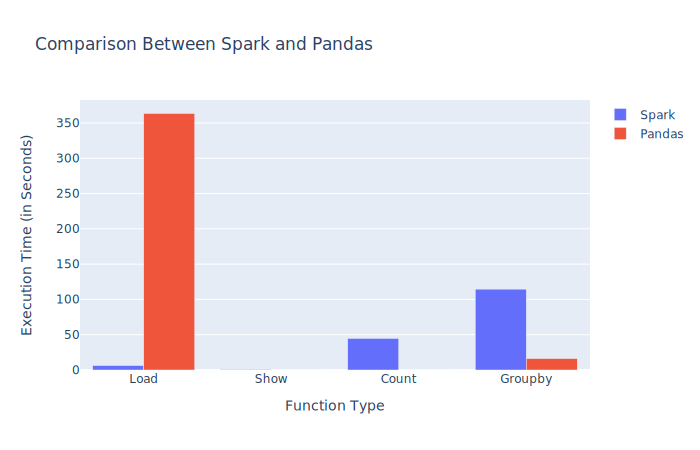

In [20]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=Compare.Type,y=Compare.Spark,name='Spark'))
fig.add_trace(go.Bar(x=Compare.Type,y=Compare.Pandas,name='Pandas'))
fig.update_layout(xaxis_title='Function Type',yaxis_title='Execution Time (in Seconds)',
                  title = 'Comparison Between Spark and Pandas')
fig.show('svg')